In [167]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from API_Keys import Alpha_API_Key
from pprint import pprint
import json

In [4]:
url = "https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2021"

In [5]:
response = requests.get(url)

In [6]:
soup = BeautifulSoup(response.text)

In [7]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html __expr-val-dir="ltr" dir="ltr" lang="en-us" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="0" http-equiv="Expires"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Daily Treasury Par Yield Curve Rates
  </title>
  <link href="/Style%20Library/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <link href="/_layouts/1033/styles/Themable/Menu.css?rev=j46FAsDJga%2BaixwEf8A%2Fgg%3D%3D" rel="stylesheet" type="text/css"/>
  <link href="/_layouts/1033/styles/Themable/corev4.css?rev=cubXjmzpjBGT%2FzzR9ULbAw%3D%3D" rel="stylesheet" type="text/css"/>
  <link href="/Style%20Library/jquery-ui-1.8.6.custom/css/ui-lightness/jquery-ui-exit.css" rel="stylesheet" type="text/css"/>
  <link href="/Style%20Library/custom/webEditing.css" rel="stylesheet" type="text/cs

In [8]:
Table= soup.find_all('table', {"class": "t-chart"})

print(Table)

[<table class="t-chart" xmlns:a="http://www.w3.org/2005/Atom" xmlns:d="http://schemas.microsoft.com/ado/2007/08/dataservices" xmlns:fmt="urn:treasury-xslt-fmt" xmlns:m="http://schemas.microsoft.com/ado/2007/08/dataservices/metadata" xmlns:msxml="urn:schemas-microsoft-com:xslt"><tr><th scope="col">Date</th><th scope="col">1 mo</th><th scope="col">2 mo</th><th scope="col">3 mo</th><th scope="col">6 mo</th><th scope="col">1 yr</th><th scope="col">2 yr</th><th scope="col">3 yr</th><th scope="col">5 yr</th><th scope="col">7 yr</th><th scope="col">10 yr</th><th scope="col">20 yr</th><th scope="col">30 yr</th></tr><tr class="oddrow"><td class="text_view_data" scope="row">01/04/21</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.10</td><td class="text_view_data">0.11</td><td class="text_view_data">0.16</td><td class="text_view_data">0.36</td><td class="text_view_data"

In [24]:
header=Table[0].find_all('th')

print(header)

[<th scope="col">Date</th>, <th scope="col">1 mo</th>, <th scope="col">2 mo</th>, <th scope="col">3 mo</th>, <th scope="col">6 mo</th>, <th scope="col">1 yr</th>, <th scope="col">2 yr</th>, <th scope="col">3 yr</th>, <th scope="col">5 yr</th>, <th scope="col">7 yr</th>, <th scope="col">10 yr</th>, <th scope="col">20 yr</th>, <th scope="col">30 yr</th>]


In [25]:
head=[]

for each in header:
    head.append(each.text)
    
head

['Date',
 '1 mo',
 '2 mo',
 '3 mo',
 '6 mo',
 '1 yr',
 '2 yr',
 '3 yr',
 '5 yr',
 '7 yr',
 '10 yr',
 '20 yr',
 '30 yr']

In [63]:
Rows= Table[0].find_all('tr')

data=[]

for each in Rows:
    yields=each.find_all('td')
    data.append(yields)
   
print(Rows)

[<tr><th scope="col">Date</th><th scope="col">1 mo</th><th scope="col">2 mo</th><th scope="col">3 mo</th><th scope="col">6 mo</th><th scope="col">1 yr</th><th scope="col">2 yr</th><th scope="col">3 yr</th><th scope="col">5 yr</th><th scope="col">7 yr</th><th scope="col">10 yr</th><th scope="col">20 yr</th><th scope="col">30 yr</th></tr>, <tr class="oddrow"><td class="text_view_data" scope="row">01/04/21</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.09</td><td class="text_view_data">0.10</td><td class="text_view_data">0.11</td><td class="text_view_data">0.16</td><td class="text_view_data">0.36</td><td class="text_view_data">0.64</td><td class="text_view_data">0.93</td><td class="text_view_data">1.46</td><td class="text_view_data">1.66</td></tr>, <tr class="evenrow"><td class="text_view_data" scope="row">01/05/21</td><td class="text_view_data">0.08</td><td class="text_view_data">0.09</td><td cl

In [58]:
data[1]

[<td class="text_view_data" scope="row">01/04/21</td>,
 <td class="text_view_data">0.09</td>,
 <td class="text_view_data">0.09</td>,
 <td class="text_view_data">0.09</td>,
 <td class="text_view_data">0.09</td>,
 <td class="text_view_data">0.10</td>,
 <td class="text_view_data">0.11</td>,
 <td class="text_view_data">0.16</td>,
 <td class="text_view_data">0.36</td>,
 <td class="text_view_data">0.64</td>,
 <td class="text_view_data">0.93</td>,
 <td class="text_view_data">1.46</td>,
 <td class="text_view_data">1.66</td>]

In [59]:
Yields=[]

for row in data[1:]:
    Dict={}
    Dict['Date']=row[0].text
    Dict['1 Month']=row[1].text
    Dict['2 Month']=row[2].text
    Dict['3 Month']=row[3].text
    Dict['6 Month']=row[4].text
    Dict['1 Year']=row[5].text
    Dict['2 Year']=row[6].text
    Dict['3 Year']=row[7].text
    Dict['5 Year']=row[8].text
    Dict['7 Year']=row[9].text
    Dict['10 Year']=row[10].text
    Dict['20 Year']=row[11].text
    Dict['30 Year']=row[12].text
    Yields.append(Dict)
    


In [60]:
Yields_DF=pd.DataFrame(Yields)

Yields_DF

,Date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,01/04/21,0.09,0.09,0.09,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66
1,01/05/21,0.08,0.09,0.09,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70
2,01/06/21,0.09,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81
3,01/07/21,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
4,01/08/21,0.08,0.08,0.08,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,12/09/21,0.03,0.06,0.06,0.12,0.28,0.70,0.99,1.26,1.42,1.49,1.91,1.87
236,12/10/21,0.03,0.06,0.06,0.13,0.27,0.67,0.98,1.25,1.42,1.48,1.91,1.88
237,12/13/21,0.01,0.05,0.05,0.11,0.27,0.66,0.95,1.21,1.37,1.42,1.86,1.81
238,12/14/21,0.02,0.05,0.05,0.13,0.26,0.67,0.98,1.23,1.39,1.44,1.87,1.82


In [100]:
# add calculated colums to dataframe instead of above method for getting y values

Yields_DF["10-1year"]=((Yields_DF['10 Year'].astype(float)) - (Yields_DF['1 Year'].astype(float)))

Yields_DF["10-5year"]=((Yields_DF['10 Year'].astype(float)) - (Yields_DF['5 Year'].astype(float)))

In [101]:
Yields_DF.head()

,Date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year,10-1year,10-5year
0,01/04/21,0.09,0.09,0.09,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66,0.83,0.57
1,01/05/21,0.08,0.09,0.09,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70,0.86,0.58
2,01/06/21,0.09,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81,0.93,0.61
3,01/07/21,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85,0.97,0.62
4,01/08/21,0.08,0.08,0.08,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87,1.03,0.64


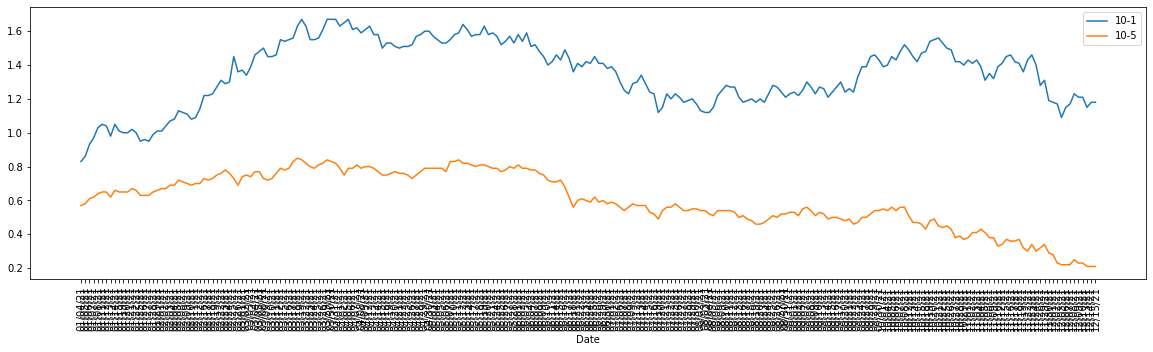

In [123]:
plt.figure(figsize=(20,5))
plt.plot(Yields_DF['Date'], Yields_DF['10-1year'], label='10-1')
plt.plot(Yields_DF['Date'], Yields_DF['10-5year'], label='10-5')

x_axis= np.arange(len(Yields_DF['Date']))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, Yields_DF['Date'], rotation=90)

plt.legend()

plt.xlabel('Date')
plt.show()

In [205]:
url= f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QQQ&outputsize=full&apikey={Alpha_API_Key}'

In [206]:
response= requests.get(url).json()

In [207]:
pprint(response)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'QQQ',
               '3. Last Refreshed': '2021-12-21',
               '4. Output Size': 'Full size',
               '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'1999-11-01': {'1. open': '131.5000',
                                        '2. high': '133.1000',
                                        '3. low': '130.6000',
                                        '4. close': '130.8000',
                                        '5. volume': '4840900'},
                         '1999-11-02': {'1. open': '131.5000',
                                        '2. high': '133.1000',
                                        '3. low': '130.4000',
                                        '4. close': '130.9000',
                                        '5. volume': '6417400'},
                         '1999-11-03': {'1. open': '132.8000',
    

                                        '4. close': '86.6900',
                                        '5. volume': '23578200'},
                         '2000-08-03': {'1. open': '84.2500',
                                        '2. high': '91.2500',
                                        '3. low': '83.3100',
                                        '4. close': '90.4400',
                                        '5. volume': '35874700'},
                         '2000-08-04': {'1. open': '92.0000',
                                        '2. high': '92.7700',
                                        '3. low': '89.1300',
                                        '4. close': '90.1300',
                                        '5. volume': '22283400'},
                         '2000-08-07': {'1. open': '90.8800',
                                        '2. high': '93.0300',
                                        '3. low': '90.2500',
                                        '4. close': '92.25

                                        '3. low': '41.5000',
                                        '4. close': '41.7600',
                                        '5. volume': '55732500'},
                         '2001-08-01': {'1. open': '42.7000',
                                        '2. high': '43.5000',
                                        '3. low': '42.4100',
                                        '4. close': '43.1000',
                                        '5. volume': '53864800'},
                         '2001-08-02': {'1. open': '43.8000',
                                        '2. high': '44.0000',
                                        '3. low': '42.8200',
                                        '4. close': '43.9100',
                                        '5. volume': '53187300'},
                         '2001-08-03': {'1. open': '43.5200',
                                        '2. high': '43.5300',
                                        '3. low': '42.5600

                                        '5. volume': '34652100'},
                         '2002-12-02': {'1. open': '28.4200',
                                        '2. high': '28.7900',
                                        '3. low': '27.5700',
                                        '4. close': '28.0000',
                                        '5. volume': '85136000'},
                         '2002-12-03': {'1. open': '27.5500',
                                        '2. high': '27.5800',
                                        '3. low': '26.9300',
                                        '4. close': '27.1700',
                                        '5. volume': '76595500'},
                         '2002-12-04': {'1. open': '26.5600',
                                        '2. high': '26.9500',
                                        '3. low': '26.2100',
                                        '4. close': '26.5700',
                                        '5. volume': '1301

                         '2004-03-30': {'1. open': '35.6700',
                                        '2. high': '35.9400',
                                        '3. low': '35.5200',
                                        '4. close': '35.9100',
                                        '5. volume': '95716500'},
                         '2004-03-31': {'1. open': '35.9200',
                                        '2. high': '36.0000',
                                        '3. low': '35.6100',
                                        '4. close': '35.8400',
                                        '5. volume': '85993900'},
                         '2004-04-01': {'1. open': '35.8100',
                                        '2. high': '36.2500',
                                        '3. low': '35.7800',
                                        '4. close': '36.1600',
                                        '5. volume': '93048600'},
                         '2004-04-02': {'1. open': '36.890

                                        '4. close': '39.2100',
                                        '5. volume': '86367300'},
                         '2005-08-15': {'1. open': '39.1400',
                                        '2. high': '39.6300',
                                        '3. low': '39.0770',
                                        '4. close': '39.4460',
                                        '5. volume': '63061100'},
                         '2005-08-16': {'1. open': '39.3000',
                                        '2. high': '39.3300',
                                        '3. low': '38.7400',
                                        '4. close': '38.8100',
                                        '5. volume': '94596000'},
                         '2005-08-17': {'1. open': '38.9200',
                                        '2. high': '39.1700',
                                        '3. low': '38.7900',
                                        '4. close': '39.04

                                        '2. high': '44.1100',
                                        '3. low': '43.6700',
                                        '4. close': '43.6900',
                                        '5. volume': '67213400'},
                         '2006-12-21': {'1. open': '43.7600',
                                        '2. high': '43.7900',
                                        '3. low': '43.2100',
                                        '4. close': '43.3800',
                                        '5. volume': '102952300'},
                         '2006-12-22': {'1. open': '43.3900',
                                        '2. high': '43.4100',
                                        '3. low': '42.9300',
                                        '4. close': '42.9300',
                                        '5. volume': '92858600'},
                         '2006-12-26': {'1. open': '42.9300',
                                        '2. high': '43.12

                                        '4. close': '49.6500',
                                        '5. volume': '140048700'},
                         '2008-05-20': {'1. open': '49.4700',
                                        '2. high': '49.4700',
                                        '3. low': '48.8900',
                                        '4. close': '49.2700',
                                        '5. volume': '137163700'},
                         '2008-05-21': {'1. open': '49.3300',
                                        '2. high': '49.6000',
                                        '3. low': '48.0200',
                                        '4. close': '48.1800',
                                        '5. volume': '192806700'},
                         '2008-05-22': {'1. open': '48.2900',
                                        '2. high': '48.6900',
                                        '3. low': '48.1100',
                                        '4. close': '48

                         '2009-09-29': {'1. open': '42.4100',
                                        '2. high': '42.6201',
                                        '3. low': '42.0300',
                                        '4. close': '42.2200',
                                        '5. volume': '106686400'},
                         '2009-09-30': {'1. open': '42.3900',
                                        '2. high': '42.6024',
                                        '3. low': '41.6000',
                                        '4. close': '42.2500',
                                        '5. volume': '173102700'},
                         '2009-10-01': {'1. open': '42.1100',
                                        '2. high': '42.1300',
                                        '3. low': '41.0000',
                                        '4. close': '41.0000',
                                        '5. volume': '140119100'},
                         '2009-10-02': {'1. open': '40.

                                        '2. high': '56.1800',
                                        '3. low': '55.5800',
                                        '4. close': '56.0800',
                                        '5. volume': '55551800'},
                         '2011-01-11': {'1. open': '56.2900',
                                        '2. high': '56.3600',
                                        '3. low': '55.9500',
                                        '4. close': '56.1600',
                                        '5. volume': '56663800'},
                         '2011-01-12': {'1. open': '56.4200',
                                        '2. high': '56.5600',
                                        '3. low': '56.2000',
                                        '4. close': '56.5550',
                                        '5. volume': '51979300'},
                         '2011-01-13': {'1. open': '56.5900',
                                        '2. high': '56.730

                                        '3. low': '64.2900',
                                        '4. close': '64.7600',
                                        '5. volume': '50267800'},
                         '2012-05-08': {'1. open': '64.3400',
                                        '2. high': '64.7400',
                                        '3. low': '63.4800',
                                        '4. close': '64.5200',
                                        '5. volume': '72659700'},
                         '2012-05-09': {'1. open': '63.7700',
                                        '2. high': '64.6800',
                                        '3. low': '63.5100',
                                        '4. close': '64.3210',
                                        '5. volume': '85715300'},
                         '2012-05-10': {'1. open': '64.6100',
                                        '2. high': '64.6300',
                                        '3. low': '63.9500

                                        '5. volume': '27142900'},
                         '2013-09-05': {'1. open': '76.7500',
                                        '2. high': '77.0550',
                                        '3. low': '76.7300',
                                        '4. close': '76.8400',
                                        '5. volume': '17809700'},
                         '2013-09-06': {'1. open': '77.0900',
                                        '2. high': '77.3400',
                                        '3. low': '76.0500',
                                        '4. close': '76.9300',
                                        '5. volume': '27715100'},
                         '2013-09-09': {'1. open': '77.2300',
                                        '2. high': '77.9600',
                                        '3. low': '77.2300',
                                        '4. close': '77.8300',
                                        '5. volume': '2516

                         '2014-12-31': {'1. open': '104.5000',
                                        '2. high': '104.9100',
                                        '3. low': '103.1000',
                                        '4. close': '103.2500',
                                        '5. volume': '24367121'},
                         '2015-01-02': {'1. open': '103.7600',
                                        '2. high': '104.2000',
                                        '3. low': '102.4400',
                                        '4. close': '102.9400',
                                        '5. volume': '31314599'},
                         '2015-01-05': {'1. open': '102.4900',
                                        '2. high': '102.6100',
                                        '3. low': '101.1400',
                                        '4. close': '101.4300',
                                        '5. volume': '36521270'},
                         '2015-01-06': {'1. op

                         '2016-06-28': {'1. open': '103.3300',
                                        '2. high': '104.5100',
                                        '3. low': '103.3000',
                                        '4. close': '104.4600',
                                        '5. volume': '28260604'},
                         '2016-06-29': {'1. open': '105.2600',
                                        '2. high': '106.5300',
                                        '3. low': '105.2310',
                                        '4. close': '106.3100',
                                        '5. volume': '31356723'},
                         '2016-06-30': {'1. open': '106.5200',
                                        '2. high': '107.6100',
                                        '3. low': '106.1300',
                                        '4. close': '107.5400',
                                        '5. volume': '36300819'},
                         '2016-07-01': {'1. op

                         '2017-12-21': {'1. open': '157.7500',
                                        '2. high': '158.2500',
                                        '3. low': '157.3700',
                                        '4. close': '157.5500',
                                        '5. volume': '18638679'},
                         '2017-12-22': {'1. open': '157.3100',
                                        '2. high': '157.4300',
                                        '3. low': '156.9500',
                                        '4. close': '157.3700',
                                        '5. volume': '23330440'},
                         '2017-12-26': {'1. open': '156.4900',
                                        '2. high': '156.7200',
                                        '3. low': '155.9500',
                                        '4. close': '156.5200',
                                        '5. volume': '21918720'},
                         '2017-12-27': {'1. op

                                        '4. close': '186.9700',
                                        '5. volume': '19939552'},
                         '2019-08-21': {'1. open': '188.6100',
                                        '2. high': '189.2300',
                                        '3. low': '187.9600',
                                        '4. close': '188.6300',
                                        '5. volume': '20745478'},
                         '2019-08-22': {'1. open': '188.9800',
                                        '2. high': '189.4600',
                                        '3. low': '186.5400',
                                        '4. close': '188.0200',
                                        '5. volume': '24270520'},
                         '2019-08-23': {'1. open': '186.7400',
                                        '2. high': '188.4500',
                                        '3. low': '181.5600',
                                        '4. cl

                                        '4. close': '335.0800',
                                        '5. volume': '29940799'},
                         '2021-04-09': {'1. open': '333.6800',
                                        '2. high': '337.3200',
                                        '3. low': '332.9200',
                                        '4. close': '337.1100',
                                        '5. volume': '36664892'},
                         '2021-04-12': {'1. open': '336.0400',
                                        '2. high': '337.1000',
                                        '3. low': '334.7300',
                                        '4. close': '336.6700',
                                        '5. volume': '25833013'},
                         '2021-04-13': {'1. open': '338.2400',
                                        '2. high': '341.0800',
                                        '3. low': '338.0200',
                                        '4. cl

In [208]:
type(response)

dict

In [209]:
Nasdaq= pd.DataFrame.from_dict(response['Time Series (Daily)'], orient='index')

In [210]:
Nasdaq

,1. open,2. high,3. low,4. close,5. volume
2021-12-21,384.0500,389.5300,380.2010,389.2100,48473403
2021-12-20,379.5650,381.5000,377.4700,380.6900,65336827
2021-12-17,383.3300,389.1900,381.7700,384.9100,81642848
2021-12-16,398.0400,398.4750,385.2100,386.8400,82591368
2021-12-15,387.9400,397.4198,383.8800,397.0500,73858028
...,...,...,...,...,...
1999-11-05,137.8000,138.4000,136.4000,136.4000,7567300
1999-11-04,135.4000,135.6000,133.6000,135.0000,10024300
1999-11-03,132.8000,134.3000,132.4000,133.5000,9376300
1999-11-02,131.5000,133.1000,130.4000,130.9000,6417400
